In [1]:
#camera matri and distortion coefficient

import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os

#prepare object points

objpoints = []
imgpoints = []

objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

pathImages = './camera_cal/'

ListOfImages = os.listdir(pathImages)
img = cv2.imread(pathImages + ListOfImages[0])
image_shape = img.shape
for idx, imagesDistort in enumerate(ListOfImages):
    img = cv2.imread(pathImages + imagesDistort)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img,(9,6),corners,ret)
        writeName = './output_images/CornersFound' + str(idx) + '.jpg'
        cv2.imwrite(writeName,img)
    else:
        print('Images not processed: ',imagesDistort)

# Now we have image points and object points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape[:2],None,None)
print('')

print('Camera Matrix: ',mtx)
print('')
print('Distortion Coefficients : ',dist)


Images not processed:  calibration1.jpg
Images not processed:  calibration4.jpg
Images not processed:  calibration5.jpg

Camera Matrix:  [[1.15777818e+03 0.00000000e+00 6.67113857e+02]
 [0.00000000e+00 1.15282217e+03 3.86124583e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients :  [[-0.24688507 -0.02373154 -0.00109831  0.00035107 -0.00259869]]


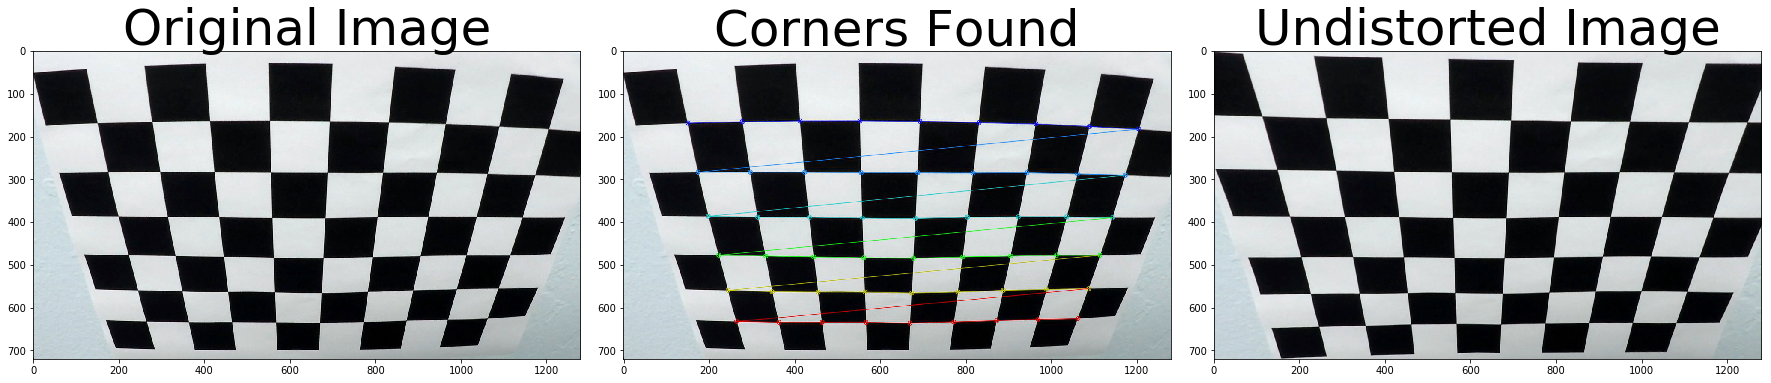

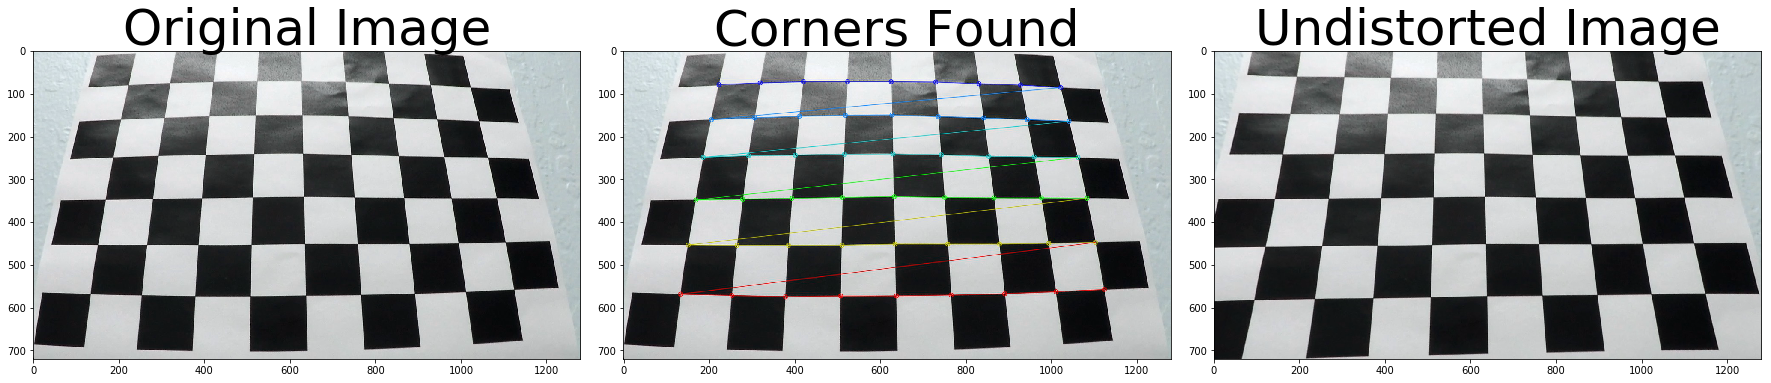

In [2]:
# We are going to give examples of the images
img = cv2.imread(pathImages + ListOfImages[11])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)


imageCorners = cv2.imread('./output_images/CornersFound' + str(11) + '.jpg')
ax2.imshow(imageCorners)
ax2.set_title('Corners Found', fontsize=50)

undist = cv2.undistort(img, mtx, dist, None, mtx)
ax3.imshow(undist)
ax3.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

img = cv2.imread(pathImages + ListOfImages[13])
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

imageCorners = cv2.imread('./output_images/CornersFound' + str(13) + '.jpg')
ax2.imshow(imageCorners)
ax2.set_title('Corners Found', fontsize=50)

undist = cv2.undistort(img, mtx, dist, None, mtx)
ax3.imshow(undist)
ax3.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



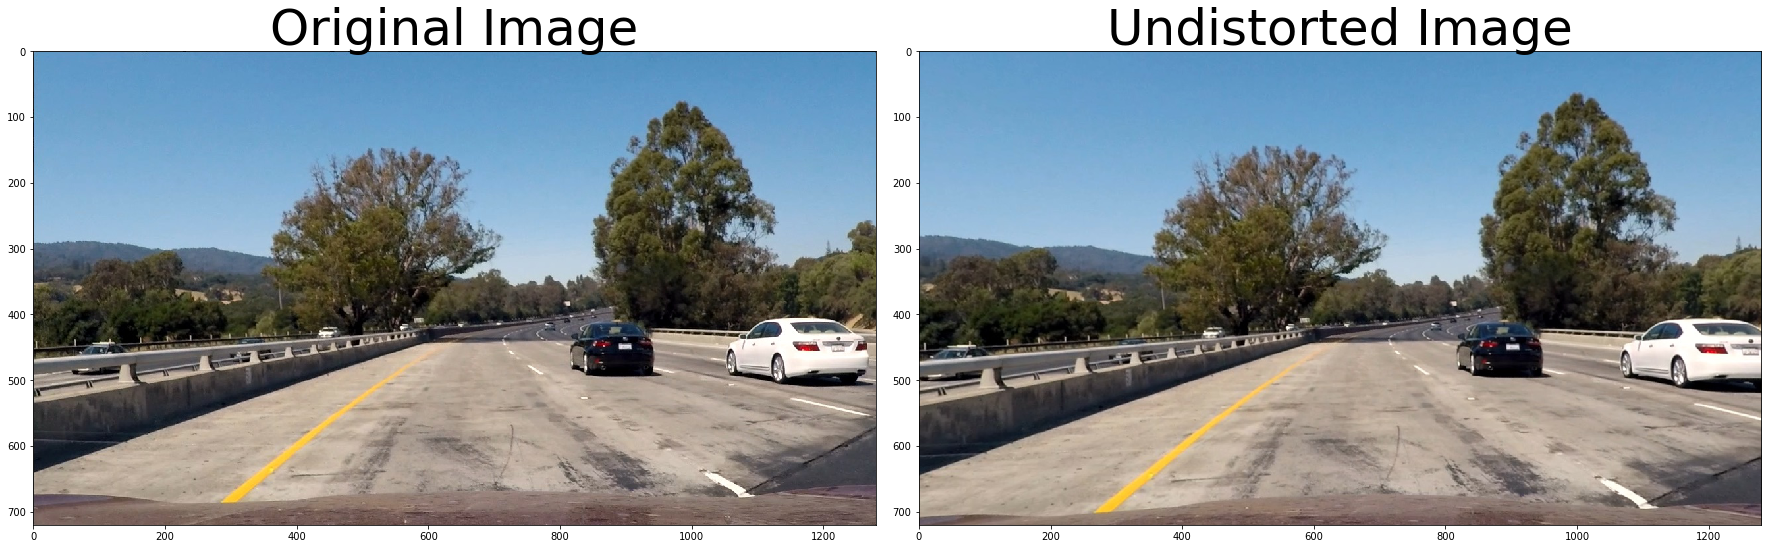

In [3]:
img = mpimg.imread('./test_images/test1.jpg')
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


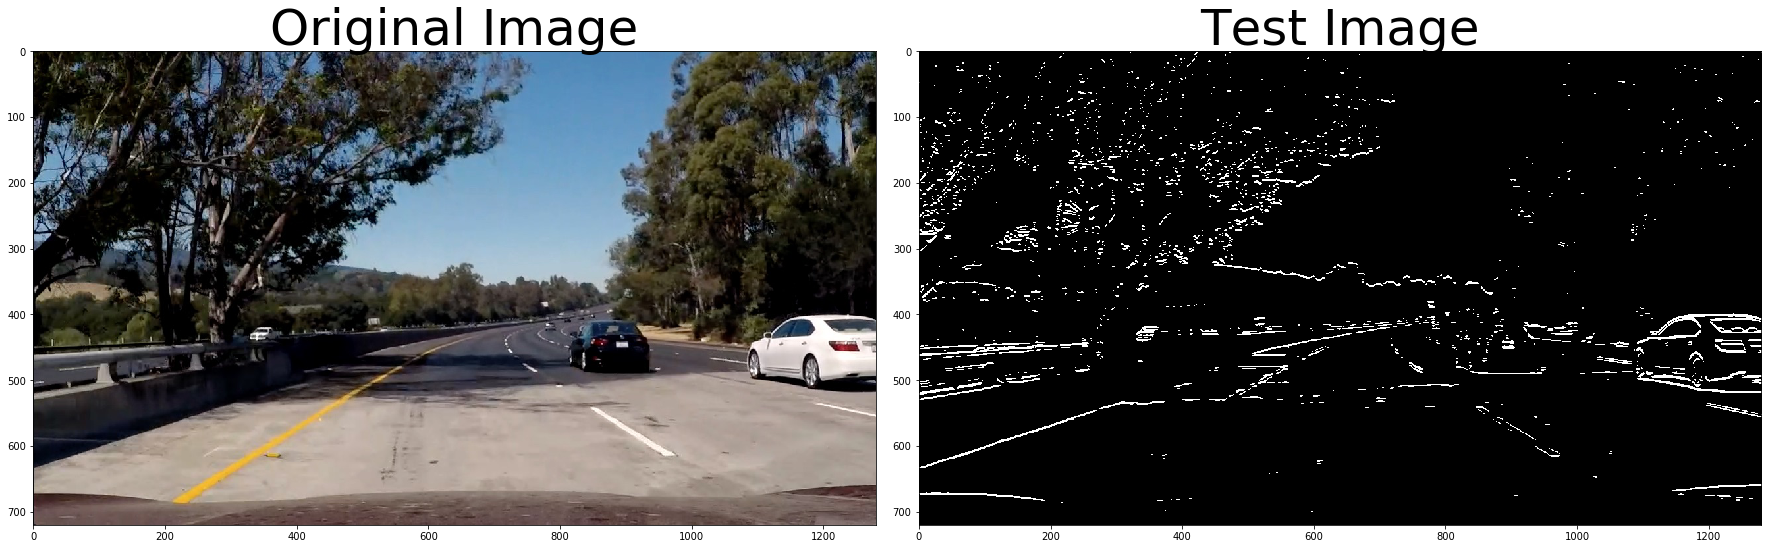

In [4]:
import matplotlib.image as mpimg

# we are going to create functions for the preprocesses of the images
def AbsSobelThreshold(gray, SobOrient=1, SobelKernel=3, threshold=(0, 255)):

    if SobOrient == 1:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=SobelKernel)
    elif SobOrient == 2:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=SobelKernel)
    sobel = np.absolute(sobel)
    ScaledSobel = np.uint8(255*sobel/np.max(sobel))
    BinaryOutput = np.zeros_like(ScaledSobel)
    BinaryOutput[(ScaledSobel > threshold[0]) & (ScaledSobel < threshold[1])] = 1
    return BinaryOutput

def GradientMagnitudeThreshold(gray, SobelKernel=3, MagnitudeThreshold=(0, 255)):

    sobelX = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=SobelKernel)
    sobelY = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=SobelKernel)
    sobel = np.sqrt(sobelX ** 2 + sobelY ** 2)
    ScaledSobel = np.uint8(255*sobel/np.max(sobel))
    BinaryOutput = np.zeros_like(ScaledSobel)
    BinaryOutput[(ScaledSobel > MagnitudeThreshold[0]) & (ScaledSobel < MagnitudeThreshold[1])] = 1
    return BinaryOutput

def GradientDirectionThreshold(gray, SobelKernel=3, threshold=(0, np.pi/2)):

    sobelX = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=SobelKernel)
    sobelY = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=SobelKernel)
    with np.errstate(divide='ignore', invalid='ignore'):
        ABSGradientDirection = np.absolute(np.arctan(sobelY/sobelX))
        DirectionBinary =  np.zeros_like(ABSGradientDirection)
        DirectionBinary[(ABSGradientDirection > threshold[0]) & (ABSGradientDirection < threshold[1])] = 1
    return DirectionBinary

img = mpimg.imread('./test_images/test5.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

BinaryOutput = AbsSobelThreshold(gray, SobOrient=2, SobelKernel=7, threshold=(55, 255))
#BinaryOutput = GradientMagnitudeThreshold(gray, SobelKernel=7, MagnitudeThreshold=(40, 255))
#DirectionBinary = GradientDirectionThreshold(gray, SobelKernel=7, threshold=(0.6, 1.2))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(BinaryOutput,cmap='gray')
ax2.set_title('Test Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

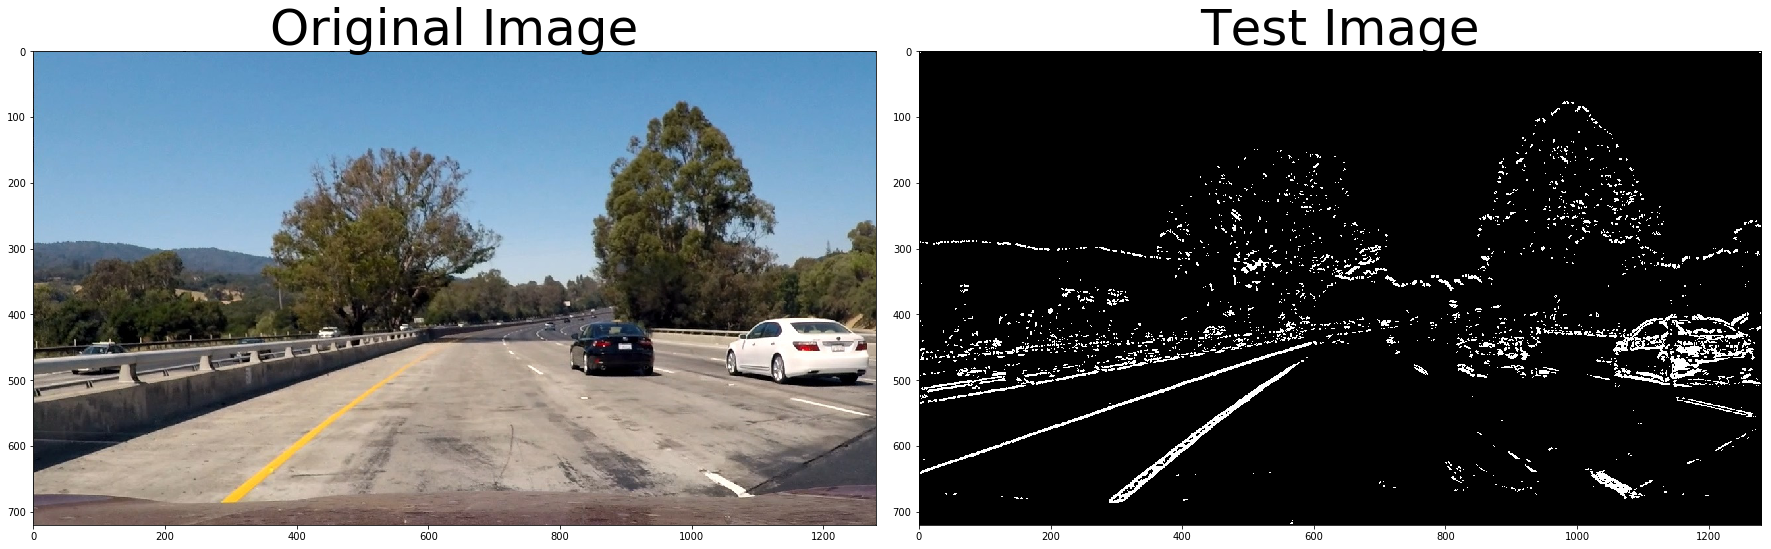

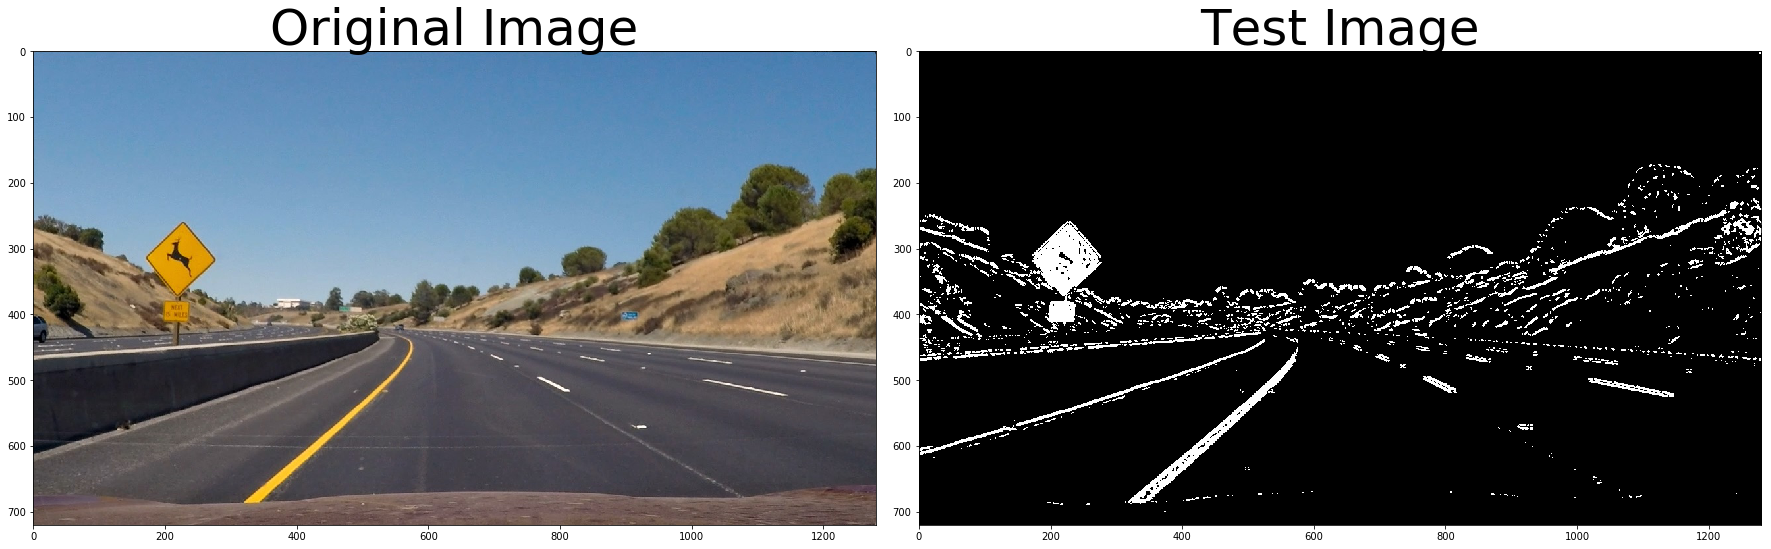

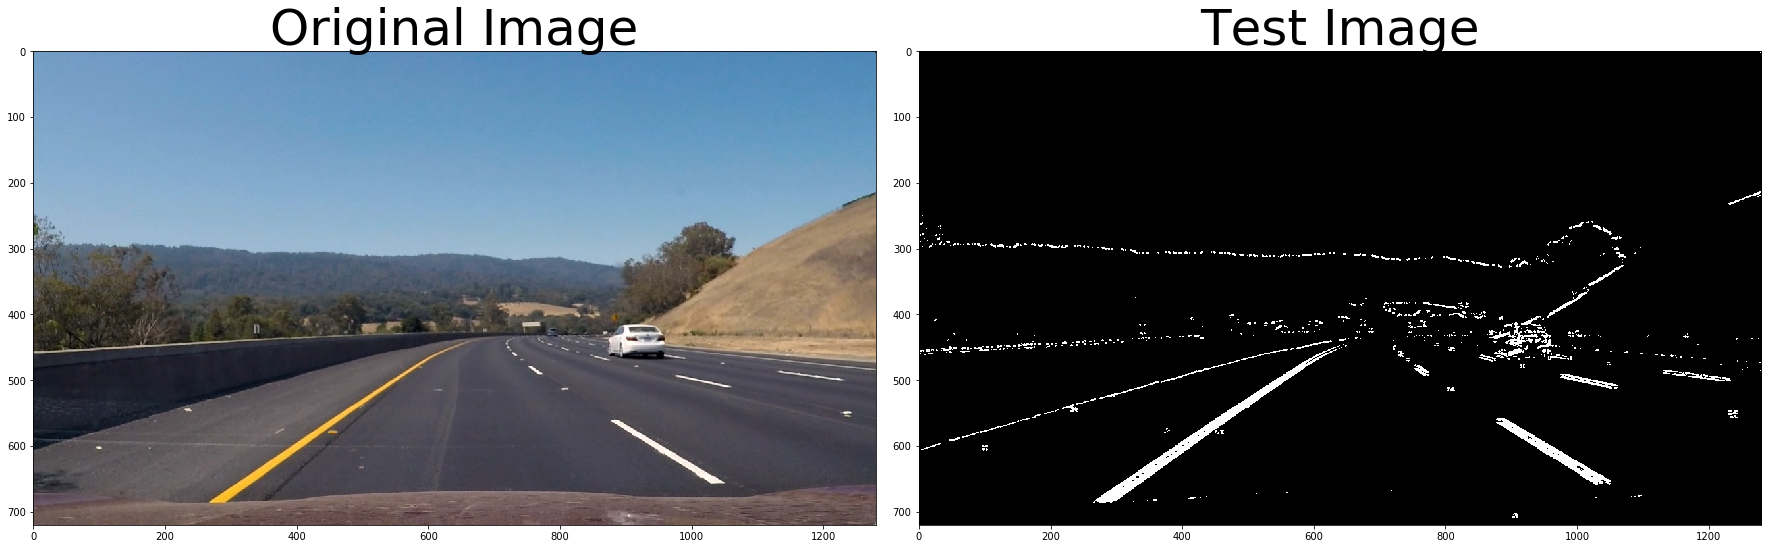

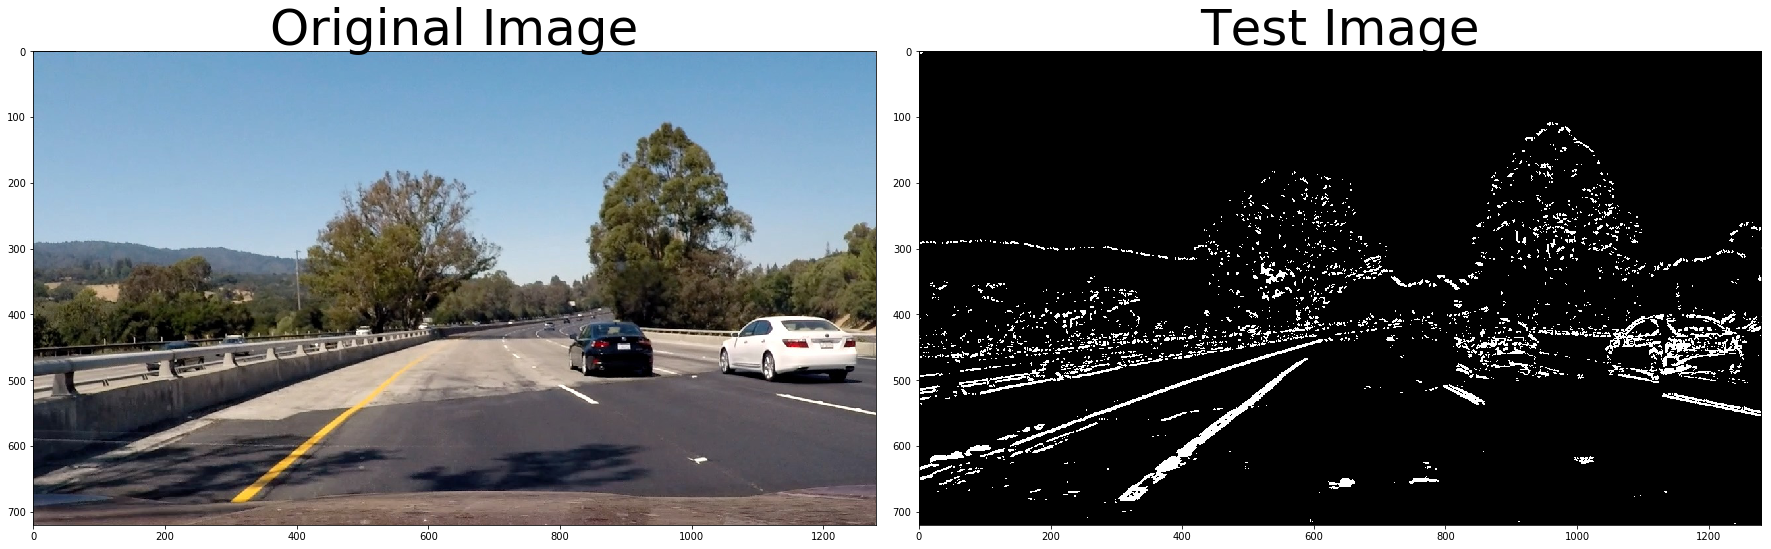

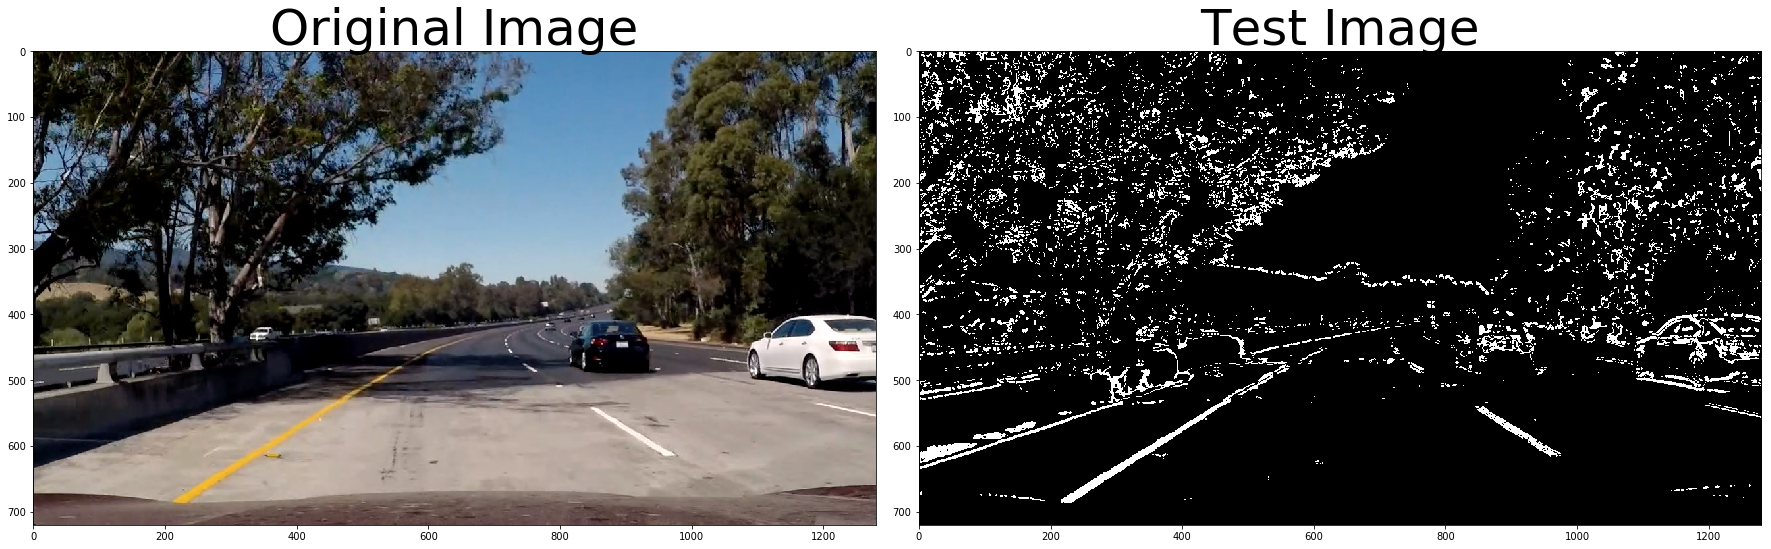

In [5]:
def RegionOfInterest(img, vertices):

    mask = np.zeros_like(img)   

    if len(img.shape) > 2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def PreProcessesOfImages (img):
    img = cv2.GaussianBlur(img, (5, 5), 0)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    SChannel = hls[:,:,2]
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    GradX = AbsSobelThreshold(gray, SobOrient=1, SobelKernel=7, threshold=(10, 255))
    GradY = AbsSobelThreshold(gray, SobOrient=2, SobelKernel=7, threshold=(55, 255))
    MagnitudeBinaryOutput = GradientMagnitudeThreshold(gray, SobelKernel=7, MagnitudeThreshold=(45, 255))
    DirectionBinaryOutput = GradientDirectionThreshold(gray, SobelKernel=7, threshold=(0.65, 1.1))
    CombinedOutput = np.zeros_like(DirectionBinaryOutput)
    CombinedOutput[((GradX == 1) & (GradY == 1)) | ((MagnitudeBinaryOutput == 1) & (DirectionBinaryOutput == 1))] = 1
    SChannelBinary = np.zeros_like(CombinedOutput)
    SChannelBinary[(SChannel > 150) & (SChannel < 255)] = 1
    ColorBinary = np.zeros_like(CombinedOutput)
    ColorBinary[(SChannelBinary > 0) | (CombinedOutput > 0)] = 1
 
    return ColorBinary

for imageID in range(1,6):
    img = mpimg.imread('./test_images/test' + str(imageID) + '.jpg')
    OutputImage = PreProcessesOfImages (img)


    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)

    ax2.imshow(OutputImage,cmap='gray')
    ax2.set_title('Test Image', fontsize=50)

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



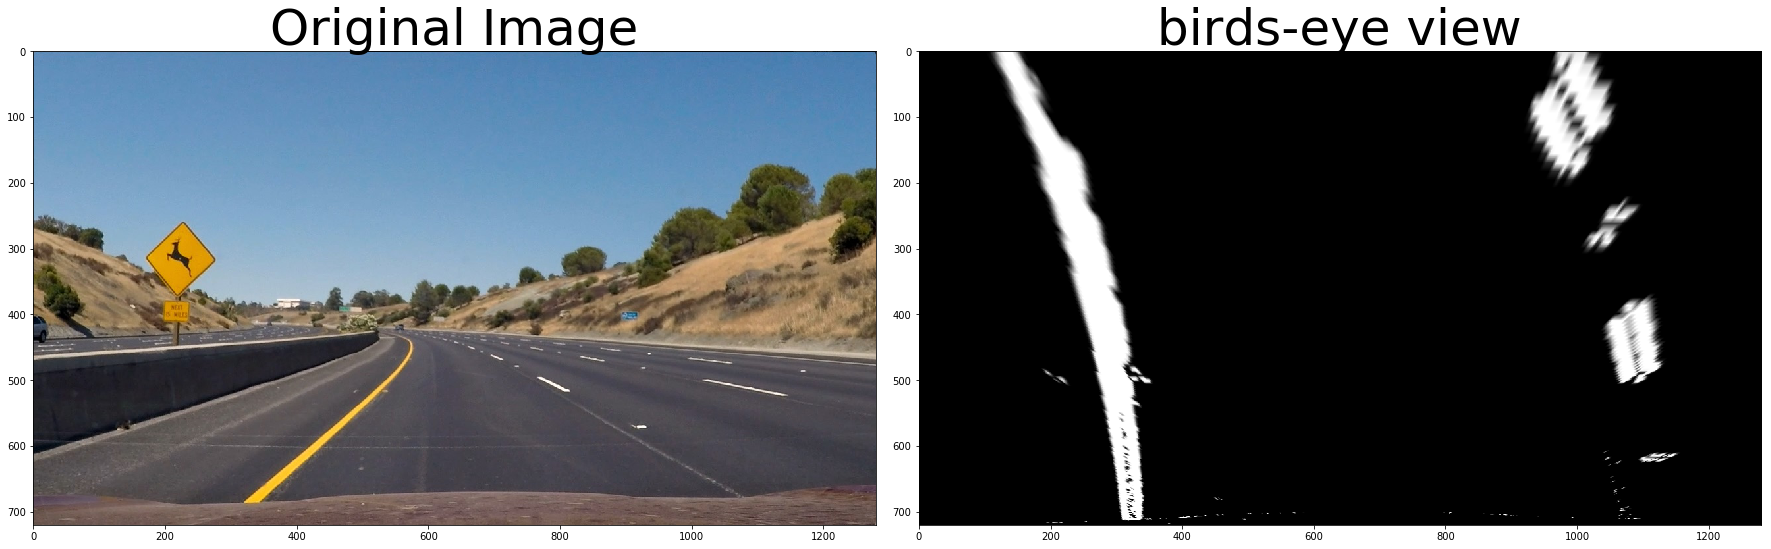

In [6]:
# Define the region
area_of_interest = [[150+430,460],[1150-440,460],[1150,720],[150,720]]

def PerspectiveOfImage(img, nx, ny, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    offset1 = 200 
    offset2 = 0 
    offset3 = 0 
    img_size = (gray.shape[1], gray.shape[0])
    src = np.float32(area_of_interest)
    dst = np.float32([[offset1, offset3], 
                      [img_size[0]-offset1, offset3], 
                      [img_size[0]-offset1, img_size[1]-offset2], 
                      [offset1, img_size[1]-offset2]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR) 
    return warped, M,Minv

img = mpimg.imread('./test_images/test' + str(2) + '.jpg')
OutputImage = PreProcessesOfImages(img)
OutputImage,M,Minv = PerspectiveOfImage(OutputImage, 9, 6, mtx, dist)




f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(OutputImage,cmap='gray')
ax2.set_title('birds-eye view', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


290 1091


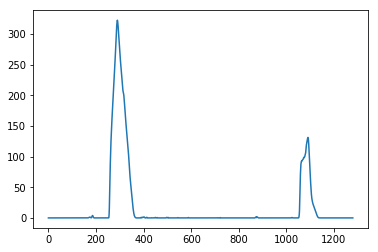

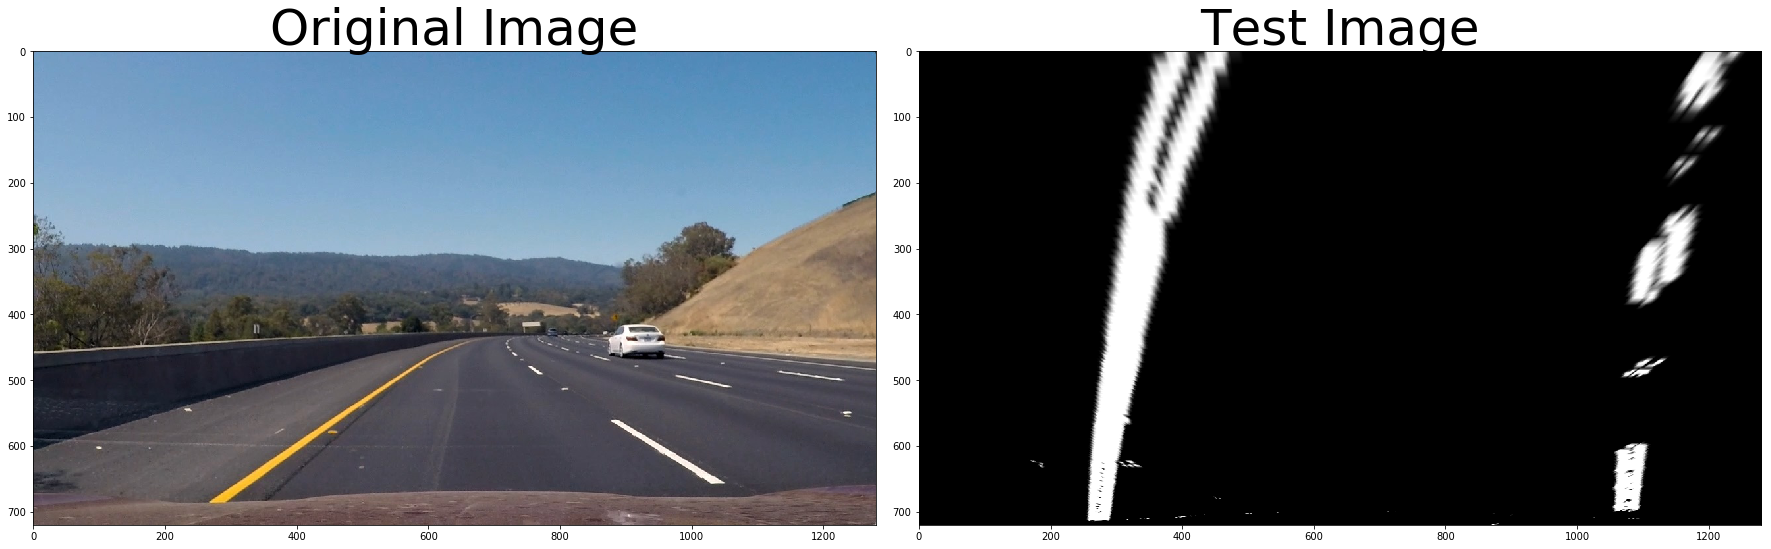

In [7]:
from scipy import signal

img = mpimg.imread('./test_images/test3.jpg')

def HistogramGenerator(img):
    histogram =np.sum(img[img.shape[0]//2:,:], axis=0)
       
    return histogram

def HistogramPeakIdentification(histogram):
    peaks = signal.find_peaks_cwt(histogram, np.arange(1,150),min_length=150)
    midpoint = np.int(histogram.shape[0]/2)
    if len(peaks) > 1:
        peak_left, *_, peak_right = peaks        
    else:   
        LeftPeaks = np.argmax(histogram[:midpoint])
        RightPeaks = np.argmax(histogram[midpoint:]) + midpoint
    
    return LeftPeaks, RightPeaks


OutputImage = PreProcessesOfImages(img)
OutputImage,M,Minv = PerspectiveOfImage(OutputImage, 9, 6, mtx, dist)

histogram = HistogramGenerator(OutputImage)

plt.plot(histogram)
LeftPeaks, RightPeaks = HistogramPeakIdentification(histogram)
print(LeftPeaks, RightPeaks)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(OutputImage,cmap='gray')
ax2.set_title('Test Image', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [8]:
from IPython.display import Image
from ipywidgets import interact, interactive, fixed

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

from multiprocessing import Pool
import dill as pickle
from functools import partial

def LoadTestVideo(VideoFileName):
    images=[]
    count=0
    
    def FrameConvertor(img):
        nonlocal count
        #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        f="%s - %d" % (VideoFileName, count)
        count += 1
        return (f,img)
    
    clip = VideoFileClip(VideoFileName)
    images = [FrameConvertor(frame) for frame in clip.iter_frames(progress_bar=True)]
    
    return images

In [9]:

def perspective_transform(img, M):
    warped = cv2.warpPerspective(img, M, dsize = (img.shape[1],img.shape[0]), flags = cv2.INTER_LINEAR)
    return warped




In [10]:
def do_project_video(file_name, output_name):
    height, width = (720,1280)
    lane = Lane(height, width, mtx, dist)
    count=0
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    def process_image(image):
        nonlocal count
        
        # process the lane image
        lane.image = image
        result = lane.result_decorated

        result = cv2.putText(result,'%4d' % count,(5,700), font, 1,(255,255,255),2,cv2.LINE_AA)
        count +=1
        
        return result

    clip1 = VideoFileClip(file_name)
    lane_clip = clip1.fl_image(process_image) 
    %time lane_clip.write_videofile(output_name, audio=False)
    
    return lane_clip

In [11]:
def Find3pCircleRadius(x1,y1,x2,y2,x3,y3):
    
    m1 = (y2-y1)/(x2-x1)
    m2 = (y3-y2)/(x3-x2)
    
    xc = (m1*m2*(y1-y3)+m2*(x1+x2)-m1*(x2+x3))/(2*(m2-m1))
    yc = -(xc-(x1+x2)/2)/m1+(y1+y2)/2
    
    Radius = np.sqrt((x2-xc)*(x2-xc)+(y2-yc)*(y2-yc))
    
    return m1, m2, xc, yc, Radius

In [12]:
def CreateVideoPreProcess(img):
    OutputCombinedImage = PreProcessesOfImages(img)
    OutputCombinedImage,M,Minv = PerspectiveOfImage(OutputCombinedImage, 9, 6, mtx, dist)
    OutputImage = np.dstack((OutputCombinedImage, OutputCombinedImage, OutputCombinedImage))*255
    histogram = HistogramGenerator(OutputCombinedImage)
    midpoint = np.int(histogram.shape[0]/2)
    LeftXBase = np.argmax(histogram[:midpoint])
    RightXBase = np.argmax(histogram[midpoint:]) + midpoint
    nwindows = 9
    WindowHeight = np.int(OutputCombinedImage.shape[0]/nwindows)
    nonzero = OutputCombinedImage.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    LeftXCurrent = LeftXBase
    RightXCurrent = RightXBase
    margin = 80
    minpix = 40
    LeftLaneInds = []
    RightLaneInds = []

    for window in range(nwindows):
        winYLow = OutputCombinedImage.shape[0] - np.int((window+1)*WindowHeight)
        winYHigh = OutputCombinedImage.shape[0] - np.int(window*WindowHeight)
        winXleftLow = LeftXCurrent - margin
        winXleftHigh = LeftXCurrent + margin
        winXrightLow = RightXCurrent - margin
        winXrightHigh = RightXCurrent + margin
        cv2.rectangle(OutputImage,(winXleftLow,winYLow),(winXleftHigh,winYHigh),(0,255,0), 2) 
        cv2.rectangle(OutputImage,(winXrightLow,winYLow),(winXrightHigh,winYHigh),(0,255,0), 2) 
        GoodLeftInds = ((nonzeroy >= winYLow) & (nonzeroy < winYHigh) & (nonzerox >= winXleftLow) & (nonzerox < winXleftHigh)).nonzero()[0]
        GoodRightInds = ((nonzeroy >= winYLow) & (nonzeroy < winYHigh) & (nonzerox >= winXrightLow) & (nonzerox < winXrightHigh)).nonzero()[0]
        LeftLaneInds.append(GoodLeftInds)
        RightLaneInds.append(GoodRightInds)
        if len(GoodLeftInds) > minpix:
            LeftXCurrent = np.int(np.mean(nonzerox[GoodLeftInds]))
        if len(GoodRightInds) > minpix:        
            RightXCurrent = np.int(np.mean(nonzerox[GoodRightInds]))

    LeftLaneInds = np.concatenate(LeftLaneInds)
    RightLaneInds = np.concatenate(RightLaneInds)


    leftx = nonzerox[LeftLaneInds]
    lefty = nonzeroy[LeftLaneInds] 
    rightx = nonzerox[RightLaneInds]
    righty = nonzeroy[RightLaneInds] 

    yvals = np.linspace(0, img.shape[0], num=img.shape[0])
    LeftFit = np.polyfit(lefty, leftx, 2)
    LeftFitx = LeftFit[0]*yvals**2 + LeftFit[1]*yvals + LeftFit[2]
    RightFit = np.polyfit(righty, rightx, 2)
    RightFitx = RightFit[0]*yvals**2 + RightFit[1]*yvals + RightFit[2]
    
    
    
    YEval = np.max(yvals)
    
    YEval1 = np.max(yvals)
    YEval2 = np.mean(yvals)
    YEval3 = np.min(yvals)
    LeftFitx_1 = LeftFit[0]*YEval1**2 + LeftFit[1]*yvals + LeftFit[2]
    LeftFitx_2 = LeftFit[0]*YEval2**2 + LeftFit[1]*yvals + LeftFit[2]
    LeftFitx_3 = LeftFit[0]*YEval3**2 + LeftFit[1]*yvals + LeftFit[2]
    RightFitx_1 = RightFit[0]*YEval1**2 + RightFit[1]*yvals + RightFit[2]
    RightFitx_2 = RightFit[0]*YEval2**2 + RightFit[1]*yvals + RightFit[2]
    RightFitx_3 = RightFit[0]*YEval3**2 + RightFit[1]*yvals + RightFit[2]
    
    lm1, lm2, lxc, lyc, lradius = Find3pCircleRadius(LeftFitx_1,YEval1,LeftFitx_2,YEval2,LeftFitx_3,YEval3,)
    LSteeringAngle = 5*360/lxc
    
    rm1, rm2, rxc, ryc, rradius = Find3pCircleRadius(RightFitx_1,YEval1,RightFitx_2,YEval2,RightFitx_3,YEval3,)
     
    RSteeringAngle = 5*360/rxc 
    TotalSterringAngle = LSteeringAngle + RSteeringAngle
    
    LeftFirstValue = LeftFitx[-1]
    RightFirstValue = RightFitx[-1]
    CameraPosition = OutputCombinedImage.shape[1]/2-(LeftFirstValue + RightFirstValue)/2


    
    ymPerPix = 30/720 # meters per pixel in y dimension
    xmPerPix = 3.7 / (RightFirstValue - LeftFirstValue)


    PtsLeft = np.array([np.transpose(np.vstack([LeftFitx, yvals]))])
    PtsRight = np.array([np.flipud(np.transpose(np.vstack([RightFitx, yvals])))])
    pts = np.hstack((PtsLeft, PtsRight))
    
    
    LeftFitCr = np.polyfit(lefty*ymPerPix, leftx*xmPerPix, 2)
    RightFitCr = np.polyfit(righty*ymPerPix, rightx*xmPerPix, 2)
    
    
    LeftCurverad = ((1 + (2*LeftFitCr[0]*YEval*ymPerPix + LeftFitCr[1])**2)**1.5) \
                             /np.absolute(2*LeftFitCr[0])

    RightCurverad = ((1 + (2*RightFitCr[0]*YEval*ymPerPix + RightFitCr[1])**2)**1.5) \
                                /np.absolute(2*RightFitCr[0])
        
    TurningRadius = (LeftCurverad + RightCurverad)/2
    
    warp_zero = np.zeros_like(OutputImage).astype(np.uint8)
    cv2.fillPoly(warp_zero, np.int_([pts]), (0,255, 0))
    cv2.polylines(warp_zero, np.array([PtsLeft], dtype=np.int32), False,(255,0,0),thickness = 15)
    cv2.polylines(warp_zero, np.array([PtsRight], dtype=np.int32), False,(0,0,255),thickness = 15)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,'Camera Position' + ' [' + str(-CameraPosition*xmPerPix)[:6] + '] m',(10,30), font, 1,(255,255,255),2)
    cv2.putText(img,'Turning Radius ' + ' ['+ str(TurningRadius)[:6] + '] m' ,(10,60), font, 1,(255,255,255),2)
    cv2.putText(img,'Steering Angle ' + '{:.6}'.format(str(TotalSterringAngle)) + '] deg',(10,90), font, 1,(255,255,255),2)
    unwarp = perspective_transform(warp_zero, Minv)
    result = cv2.addWeighted(img, 1, unwarp, 0.3, 0)
    
    return result

(720, 1280, 3)


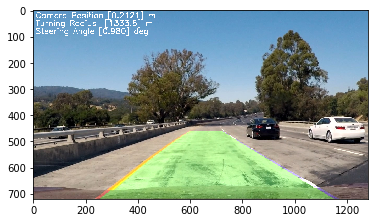

In [13]:
image = mpimg.imread('test_images/test1.jpg')
out_img = CreateVideoPreProcess(image)
plt.imshow(out_img)
writeName = './output_images/Final_preproccessed_image.png'
cv2.imwrite(writeName,out_img)
print(image.shape)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

write_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")
write_clip = clip1.fl_image(CreateVideoPreProcess) #NOTE: this function expects color images!!
%time write_clip.write_videofile(write_output, audio=False)